In [22]:
import sys
import numpy as np
from cgp.cgp import CgpConfig, Individual
from cgp.utils import plot_graph, plot_cartesian
from IPython.display import SVG, HTML
from IPython.display import Image as Img
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import io

In [19]:
def conv(input):
    pass

def conv_3x3(input):
    pass

def conv_7x7(input):
    pass

def depth_conv(input):
    pass

def max_pooling(input):
    pass

def sum(a, b):
    pass

def concat(input):
    pass

10


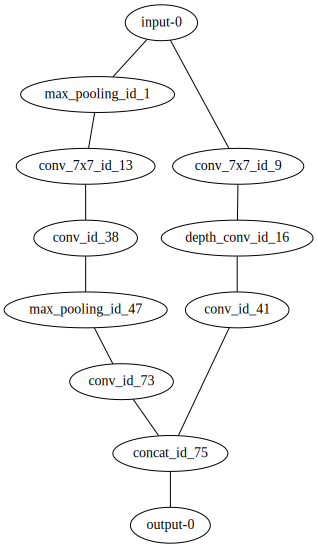

In [20]:
functions = [conv, conv_3x3, conv_7x7, depth_conv, sum, concat, max_pooling]
inputs = [1, 1, 1, 1, 2, 2, 1]
cfg = CgpConfig(5, 20, 10, functions, inputs)
cfg.num_input = 1
cfg.num_output = 1
indivdual = Individual(cfg)

print(len(np.where(indivdual.active == True)[0]))
graph = plot_graph(indivdual)
SVG(graph.create(prog='dot', format='svg'))

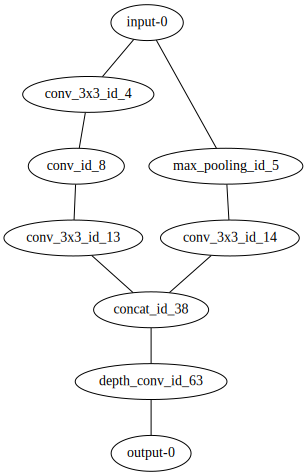

In [4]:
graph = plot_graph(indivdual)
SVG(graph.create(prog='dot', format='svg'))

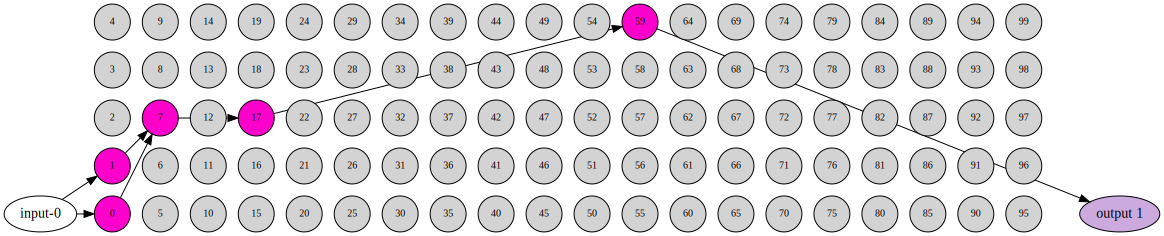

In [12]:
graph = plot_cartesian(indivdual)
SVG(graph.create(prog='neato', format='svg'))

In [6]:
mut_cnt = 0
fig = plt.figure(figsize=(18,4))
plt.axis('off')
plt.suptitle("root")
graph.set('dpi', 150)
img = graph.create(prog='neato', format='png')
im = plt.imshow(Image.open(io.BytesIO(img)), animated=True)

def init_func(*args):
    global mut_cnt
    mut_cnt = 0
    return im,

def updatefig(*args):
    global im, mut_cnt
    mut_cnt += 1
    indivdual.mutate()
    graph = plot_cartesian(indivdual)
    img = graph.create(prog='neato', format='png')
    plt.suptitle("mutation %d" % mut_cnt)
    im.set_data(Image.open(io.BytesIO(img)))
    return im, 

anim = animation.FuncAnimation(fig, updatefig, init_func=init_func, frames=20, interval=1500, blit=False)
#write = animation.FFMpegWriter(fps=0.5, bitrate=1000, extra_args=['-vcodec', 'libx264'])
#anim.save('anim.mp4', writer=write, dpi=150)
anim.save('anim.gif', dpi=150, writer='imagemagick')
plt.close()

[]('anim.gif')

<img src="anim.gif?as">